In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [321]:
import warnings 
warnings.filterwarnings(action='ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [460]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [323]:
df = pd.read_csv('titanic_data.csv')
df.shape

(891, 12)

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [325]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [326]:
df = df.reindex(columns=['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived'])
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [327]:
df.nunique()

PassengerId    891
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
Survived         2
dtype: int64

### 1 PassengerID

In [328]:
df['PassengerId'].value_counts()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

In [329]:
df['PassengerId'].isna().sum()

0

In [330]:
df['PassengerId'].dtype

dtype('int64')

### 2 Pclass

In [331]:
vc = df['Pclass'].value_counts()
vc

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [332]:
df['Pclass'].isna().sum()

0

In [333]:
df['Pclass'].dtype

dtype('int64')

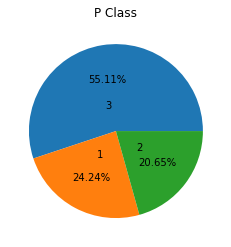

In [334]:
plt.pie(x=vc.values,labels=vc.index,autopct='%.2f%%',labeldistance=0.3)
plt.title('P Class')
plt.show()


### 3. Name

In [335]:
df['Name'].nunique()

891

In [336]:
df['Name'].isna().sum()

0

In [337]:
df['Name'].dtype

dtype('O')

### 4 Sex

In [338]:
vc = df['Sex'].value_counts()
vc

male      577
female    314
Name: Sex, dtype: int64

In [339]:
df['Sex'].isna().sum()

0

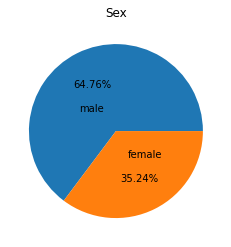

In [340]:
plt.pie(x=vc.values,labels=vc.index,autopct='%.2f%%',labeldistance=0.3)
plt.title('Sex')
plt.show()

### 5 Age

In [341]:
df['Age'].nunique()

88

In [342]:
df['Age'].isna().sum()

177

In [343]:
df[df['Age'].isna()]['Sex'].value_counts()

male      124
female     53
Name: Sex, dtype: int64

In [344]:
df[df['Age'].isna()]['Pclass'].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

In [345]:
df[df['Age'].isna()][['Pclass','Sex']].value_counts()

Pclass  Sex   
3       male      94
        female    42
1       male      21
2       male       9
1       female     9
2       female     2
dtype: int64

In [346]:
df[df['Age'].isna()][['Pclass','Sex']]

,Pclass,Sex
5,3,male
17,2,male
19,3,female
26,3,male
28,3,female
...,...,...
859,3,male
863,3,female
868,3,male
878,3,male


<AxesSubplot:xlabel='Sex', ylabel='count'>

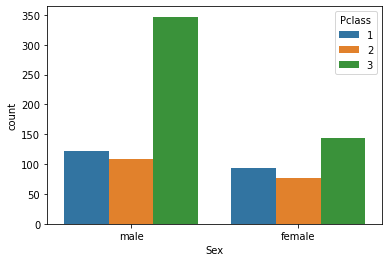

In [347]:
sns.countplot(data=df,x='Sex',hue='Pclass')

In [348]:
df['Age'].dtype

dtype('float64')

In [349]:
df.groupby(by=['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

#### format  agepclassmean = value 

In [350]:
female1mean = 34.0
male1mean = 41.0

female2mean = 28.0
male2mean = 30.0

female3mean = 21.0
male3mean = 26.0

In [351]:
df.groupby(by=['Pclass','Sex'])['Age'].mean()[1]

Sex
female    34.611765
male      41.281386
Name: Age, dtype: float64

In [352]:
# df.loc[ (df['Age'].isna()) & (df['Pclass']==1) & (df['Sex']=='female') ,: ]

In [353]:
dfage = df.copy()

### Filling mean value for female first class 

In [354]:
dfage.loc[ (dfage['Age'].isna()) & (dfage['Pclass']==1) & (dfage['Sex']=='female') ,: ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1
166,167,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,1
256,257,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C,1
306,307,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C,1
334,335,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S,1
375,376,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C,1
457,458,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S,1
669,670,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S,1
849,850,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C,1


In [355]:
female1mean

34.0

In [356]:
dfage.loc[ (dfage['Age'].isna()) & (dfage['Pclass']==1) & (dfage['Sex']=='female') , 'Age' ]  = female1mean

In [357]:
dfage.iloc[31,]

PassengerId                                                32
Pclass                                                      1
Name           Spencer, Mrs. William Augustus (Marie Eugenie)
Sex                                                    female
Age                                                        34
SibSp                                                       1
Parch                                                       0
Ticket                                               PC 17569
Fare                                                  146.521
Cabin                                                     B78
Embarked                                                    C
Survived                                                    1
Name: 31, dtype: object

### Filled mean value for male first class 

In [358]:
dfage.loc[ (dfage['Age'].isna()) & (dfage['Pclass']==1) & (dfage['Sex']=='male')  ]  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
55,56,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,1
64,65,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,0
168,169,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,0
185,186,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S,0
270,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,0
284,285,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S,0
295,296,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C,0
298,299,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S,1
351,352,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,0
475,476,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,0


In [359]:
male1mean

41.0

In [360]:
dfage.loc[ (dfage['Age'].isna()) & (dfage['Pclass']==1) & (dfage['Sex']=='male'), 'Age'  ] = male1mean

In [361]:
dfage.iloc[55]['Age']

41.0

### Filled mean value for female second class 

In [362]:
dfage.loc[ (dfage['Age'].isna()) & (dfage['Pclass']==2) & (dfage['Sex']=='female')  ] 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
303,304,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.35,E101,Q,1
596,597,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,33.00,NaN,S,1


In [363]:
female2mean

28.0

In [364]:
dfage.loc[ (dfage['Age'].isna()) & (dfage['Pclass']==2) & (dfage['Sex']=='female') , 'Age' ]  = female2mean

In [365]:
dfage.iloc[303]['Age']

28.0

### Filled mean value for male second class 

In [366]:
dfage.loc[ (dfage['Age'].isna()) & (dfage['Pclass']==2) & (dfage['Sex']=='male')  ] 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
181,182,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C,0
277,278,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S,0
413,414,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,0
466,467,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S,0
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,0
547,548,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C,1
674,675,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S,0
732,733,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S,0


In [367]:
male2mean

30.0

In [368]:
dfage.loc[ (dfage['Age'].isna()) & (dfage['Pclass']==2) & (dfage['Sex']=='male') ,'Age' ] = male2mean

In [369]:
dfage.iloc[17]['Age']

30.0

### Filled mean value for female third class 

In [370]:
dfage.loc[ (dfage['Age'].isna()) & (dfage['Pclass']==3) & (dfage['Sex']=='female')  ].shape

(42, 12)

In [371]:
dfage.loc[ (dfage['Age'].isna()) & (dfage['Pclass']==3) & (dfage['Sex']=='female')  ].head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1


In [372]:
female3mean

21.0

In [373]:
dfage.loc[ (dfage['Age'].isna()) & (dfage['Pclass']==3) & (dfage['Sex']=='female') , 'Age' ] = female3mean

In [374]:
dfage.iloc[19]['Age']

21.0

### Filled mean value for male third class 

In [375]:
dfage.loc[ (dfage['Age'].isna()) & (dfage['Pclass']==3) & (dfage['Sex']=='male')  ].shape

(94, 12)

In [376]:
dfage.loc[ (dfage['Age'].isna()) & (dfage['Pclass']==3) & (dfage['Sex']=='male')  ].head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
26,27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0


In [377]:
male3mean

26.0

In [378]:
dfage.loc[ (dfage['Age'].isna()) & (dfage['Pclass']==3) & (dfage['Sex']=='male'), 'Age'  ] = male3mean

In [379]:
dfage.iloc[5]['Age']

26.0

## Filled Missing Values In Age Column

In [380]:
dfage['Age'].isna().sum()

0

In [381]:
df = dfage.copy()

In [382]:
df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

Text(0.5, 1.0, 'Age DistPlot')

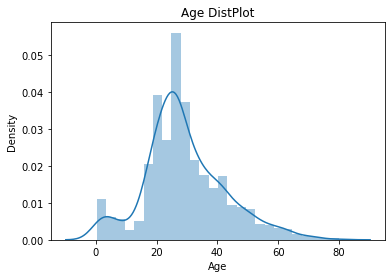

In [383]:
sns.distplot(df['Age'])
plt.title('Age DistPlot')

Text(0.5, 1.0, 'Age Violin Plot')

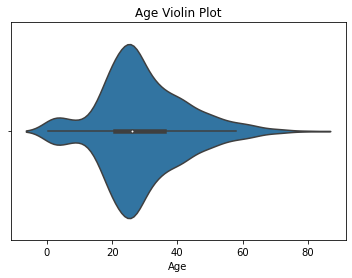

In [384]:
sns.violinplot(df['Age'])
plt.title('Age Violin Plot')

### 6. SibSp

In [385]:
df['SibSp'].isna().sum()

0

In [386]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

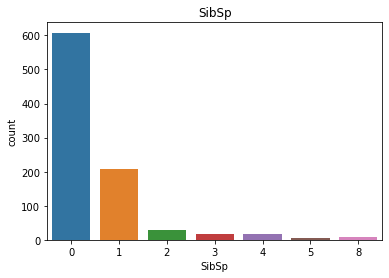

In [387]:
sns.countplot(data=df.sort_values(by='SibSp'),x='SibSp')
plt.title('SibSp')
plt.show()

Text(0.5, 1.0, 'Age violinplot')

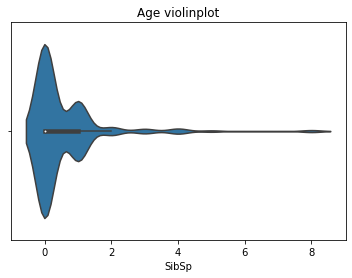

In [388]:
sns.violinplot(df['SibSp'])
plt.title('Age violinplot')

### 7 Parch

In [389]:
df['Parch'].isna().sum()

0

In [390]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

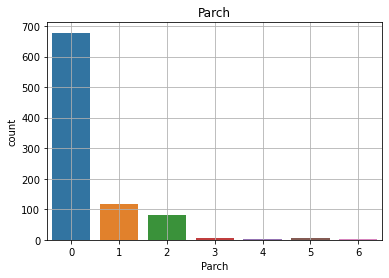

In [391]:
sns.countplot(data=df.sort_values(by='Parch'),x='Parch')
plt.title('Parch')
plt.grid(which='both')
plt.show()

Text(0.5, 1.0, 'Parch violinplot')

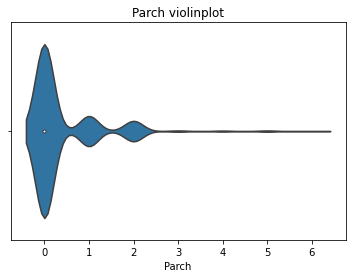

In [392]:
sns.violinplot(df['Parch'])
plt.title('Parch violinplot')

### 8 Ticket

In [393]:
df['Ticket'].nunique()

681

In [394]:
df['Ticket'].isna().sum()

0

### 9 Fare

In [395]:
df['Fare'].isna().sum()

0

In [396]:
df['Fare'].nunique()

248

<AxesSubplot:xlabel='Fare', ylabel='Density'>

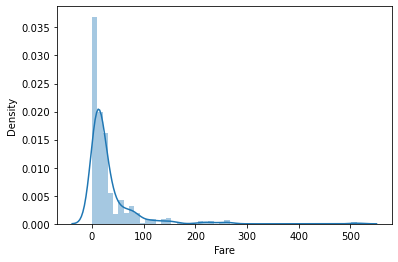

In [397]:
sns.distplot(df['Fare'])

<AxesSubplot:xlabel='Fare'>

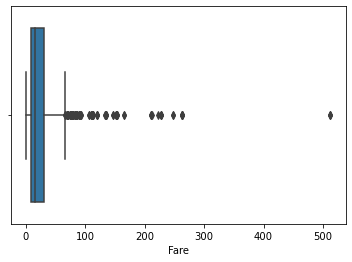

In [398]:
sns.boxplot(df['Fare'])

In [399]:
df.loc[df['Fare']>500]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1


### 10 Cabin

In [400]:
df['Cabin'].isna().sum()

687

In [401]:
df['Cabin'].nunique()

147

In [402]:
df['Cabin'].value_counts().head()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
D              3
Name: Cabin, dtype: int64

### 11 Embarked

In [403]:
df['Embarked'].isna().sum()

2

In [404]:
df['Embarked'].nunique()

3

In [405]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [406]:
df[df['Embarked'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


### fillind mode value in missing places of embarked

In [407]:
si = SimpleImputer(strategy='most_frequent')

In [408]:
df[['Embarked']] = si.fit_transform(df[['Embarked']])

In [409]:
df[df['Embarked'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived


### 12 Survived

In [410]:
df['Survived'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Survived', ylabel='count'>

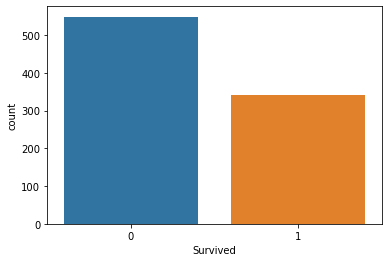

In [411]:
sns.countplot(df['Survived'])

In [412]:
df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Survived         0
dtype: int64

In [413]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [414]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### EDA 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

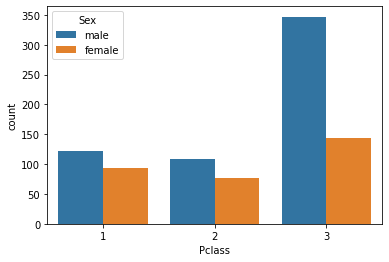

In [415]:
sns.countplot(x=df['Pclass'],hue=df['Sex'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

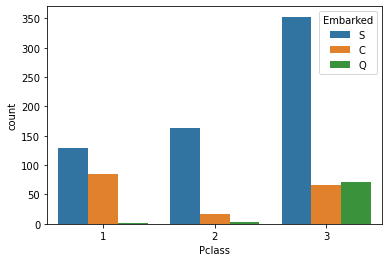

In [416]:
sns.countplot(x=df['Pclass'],hue=df['Embarked'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

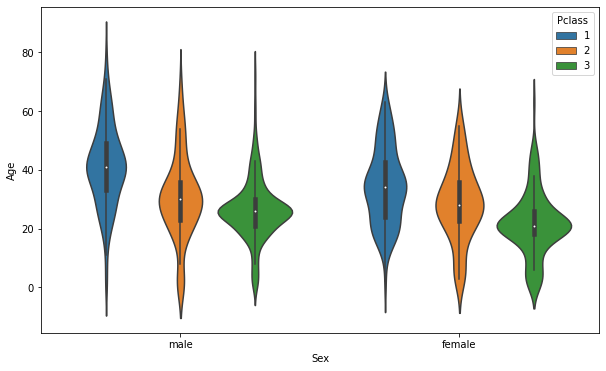

In [417]:
plt.figure(figsize=(10,6))
sns.violinplot(y=df['Age'],x=df['Sex'],hue=df['Pclass'])

### Preprocessing 

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


### Dropping columns

In [419]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 48.8+ KB


In [420]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [421]:
df['Sex'] = df['Sex'].replace({'male':1,'female':2})

In [422]:
df['Sex'].unique()

array([1, 2], dtype=int64)

In [423]:
df.select_dtypes(include='object').columns

Index(['Embarked'], dtype='object')

In [424]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [425]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [426]:
le = LabelEncoder()

In [427]:
df['Embarked'] = df['Embarked'].replace({'Q':1,'C':2,'S':3})

In [428]:
df['Embarked'].value_counts()

3    646
2    168
1     77
Name: Embarked, dtype: int64

In [429]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


### Data Science

In [431]:
x = df.drop(['Survived'],axis=1)
y = df['Survived']

In [432]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=13)
x_train.shape , y_train.shape, x_test.shape, y_test.shape

((668, 7), (668,), (223, 7), (223,))

In [433]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,3,0
1,1,2,38.0,1,0,71.2833,2,1
2,3,2,26.0,0,0,7.9250,3,1
3,1,2,35.0,1,0,53.1000,3,1
4,3,1,35.0,0,0,8.0500,3,0


In [446]:
x_train_scaled, x_test_scaled , y_train_scaled, y_test_scaled = x_train.copy(), x_test.copy() , y_train.copy(), y_test.copy()

x_train_scaled.shape, x_test_scaled.shape , y_train_scaled.shape, y_test_scaled.shape

((668, 7), (223, 7), (668,), (223,))

In [447]:
ss = StandardScaler()

x_train_scaled[['Age','Fare']] = ss.fit_transform(x_train_scaled[['Age','Fare']])
x_test_scaled[['Age','Fare']] = ss.fit_transform(x_test_scaled[['Age','Fare']])

In [449]:
x_train_scaled.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
400,3,1,0.729175,0,0,-0.487716,3
289,3,2,-0.541834,0,0,-0.490998,1


In [540]:
result = dict()
resultScaled = dict()

### 1. Logistic Regression

In [541]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

acclr = accuracy_score(y_test,y_pred)*100

print('Lr Acc =',acclr)

result['Lr'] = acclr

Lr Acc = 82.51121076233184


In [542]:
lr = LogisticRegression()

lr.fit(x_train_scaled,y_train)

y_pred = lr.predict(x_test_scaled)

acclrS = accuracy_score(y_test,y_pred)*100

print('LrS Acc =',acclrS)

resultScaled['LrS'] = acclrS

LrS Acc = 82.51121076233184


### 2. Decision Tree

In [543]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train,y_train)

y_pred = dtc.predict(x_test)

accdtc = accuracy_score(y_test,y_pred)*100

print('dtc Acc =',accdtc)

result['dtc'] = accdtc

dtc Acc = 77.13004484304933


In [544]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_scaled,y_train)

y_pred = dtc.predict(x_test_scaled)

accdtcS = accuracy_score(y_test,y_pred)*100

print('dtcS Acc =',accdtcS)

resultScaled['dtcS'] = accdtcS

dtcS Acc = 76.23318385650224


### 3. Random Forest 

In [545]:
rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(x_train,y_train)

y_pred = rfc.predict(x_test)

accrfc = accuracy_score(y_test,y_pred)*100

print('rfc Acc =',accrfc)

result['rfc'] = accrfc

rfc Acc = 79.37219730941703


In [546]:
rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(x_train_scaled,y_train)

y_pred = rfc.predict(x_test_scaled)

accrfcS = accuracy_score(y_test,y_pred)*100

print('rfcS Acc =',accrfcS)

resultScaled['rfcS'] = accrfcS

rfcS Acc = 81.16591928251121


### 5. SVC

In [547]:
svc = SVC()

svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)

accsvc = accuracy_score(y_test,y_pred)*100

print('svc Acc =',accsvc)

result['svc'] = accsvc

svc Acc = 72.19730941704036


In [548]:
svc = SVC()

svc.fit(x_train_scaled,y_train)

y_pred = svc.predict(x_test_scaled)

accsvcS = accuracy_score(y_test,y_pred)*100

print('svcS Acc =',accsvcS)

resultScaled['svcS'] = accsvcS

svcS Acc = 81.61434977578476


### 6. KNN

In [549]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

accknn = accuracy_score(y_test,y_pred)*100

print('knn Acc =',accknn)

result['knn'] = accknn

knn Acc = 74.43946188340807


In [550]:
knn = KNeighborsClassifier()

knn.fit(x_train_scaled,y_train)

y_pred = knn.predict(x_test_scaled)

accknnS = accuracy_score(y_test,y_pred)*100

print('knnS Acc =',accknnS)

resultScaled['knnS'] = accknnS

knnS Acc = 82.51121076233184


### Result

In [551]:
result

{'Lr': 82.51121076233184,
 'dtc': 77.13004484304933,
 'rfc': 79.37219730941703,
 'svc': 72.19730941704036,
 'knn': 74.43946188340807}

In [552]:
resultScaled

{'LrS': 82.51121076233184,
 'dtcS': 76.23318385650224,
 'rfcS': 81.16591928251121,
 'svcS': 81.61434977578476,
 'knnS': 82.51121076233184}

In [555]:
result1acc = [value for value in result.values()] 
result1models = [model for model in result.keys()] 

In [556]:
result2acc = [value for value in resultScaled.values()] 
result2models = [model for model in resultScaled.keys()] 

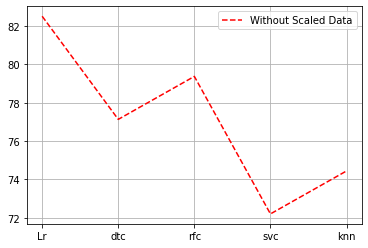

In [569]:
plt.plot(result1models,result1acc,'r--',label='Without Scaled Data')
plt.legend()
plt.grid()

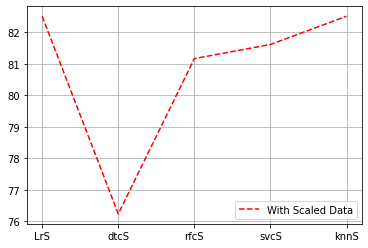

In [570]:
plt.plot(result2models,result2acc,'r--',label='With Scaled Data')
plt.legend()
plt.grid()

In [572]:
corr = df.corr()
corr

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,-0.131900,-0.410040,0.083081,0.018443,-0.549500,-0.045702,-0.338481
Sex,-0.131900,1.000000,-0.113290,0.114631,0.245489,0.182333,-0.116569,0.543351
Age,-0.410040,-0.113290,1.000000,-0.251669,-0.178596,0.120039,0.054865,-0.066539
SibSp,0.083081,0.114631,-0.251669,1.000000,0.414838,0.159651,0.059961,-0.035322
Parch,0.018443,0.245489,-0.178596,0.414838,1.000000,0.216225,0.078665,0.081629
Fare,-0.549500,0.182333,0.120039,0.159651,0.216225,1.000000,-0.062142,0.257307
Embarked,-0.045702,-0.116569,0.054865,0.059961,0.078665,-0.062142,1.000000,-0.106811
Survived,-0.338481,0.543351,-0.066539,-0.035322,0.081629,0.257307,-0.106811,1.000000


<AxesSubplot:>

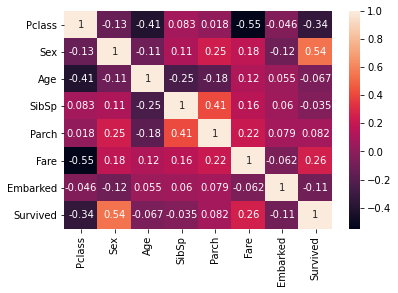

In [574]:
sns.heatmap(corr,annot=True)

### Taking only most important features 

In [586]:
acc1 = dict()

In [580]:
x = df[['Pclass','Sex','Fare']]
y = df['Survived']

In [583]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=13)

In [584]:
def modelWithoutScaledData(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)*100
    print('Acc = ',acc)
    return acc

In [587]:
lr = LogisticRegression()

acc1['lr'] = modelWithoutScaledData(lr)

Acc =  79.37219730941703


In [588]:
dtc = DecisionTreeClassifier()

acc1['dtc'] = modelWithoutScaledData(dtc)

Acc =  84.30493273542601


In [591]:
rfc = RandomForestClassifier(n_estimators=200)

acc1['rfc'] = modelWithoutScaledData(rfc)

Acc =  83.40807174887892


In [592]:
svc = SVC()

acc1['svc'] = modelWithoutScaledData(svc)

Acc =  71.74887892376681


In [593]:
knn = KNeighborsClassifier()

acc1['knn'] = modelWithoutScaledData(knn)

Acc =  78.02690582959642


In [594]:
acc1

{'lr': 79.37219730941703,
 'dtc': 84.30493273542601,
 'rfc': 83.40807174887892,
 'svc': 71.74887892376681,
 'knn': 78.02690582959642}

In [605]:
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = x_train.copy(),x_test.copy(),y_train.copy(),y_test.copy() 

In [606]:
x_train_scaled['Fare'] = ss.fit_transform(x_train_scaled[['Fare']])
x_test_scaled['Fare'] = ss.fit_transform(x_test_scaled[['Fare']])

In [607]:
def modelWithScaledData(model):
    model.fit(x_train_scaled,y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test,y_pred)*100
    print('Acc = ',acc)
    return acc

In [608]:
acc2 = dict()

In [618]:
lr = LogisticRegression()

acc2['lr'] = modelWithScaledData(lr)

Acc =  79.37219730941703


In [619]:
dtc = DecisionTreeClassifier()

acc2['dtc'] = modelWithScaledData(dtc)

Acc =  80.71748878923766


In [620]:
rfc = RandomForestClassifier(n_estimators=200)

acc2['rfc'] = modelWithScaledData(rfc)

Acc =  81.16591928251121


In [621]:
svc = SVC()

acc2['svc'] = modelWithScaledData(svc)

Acc =  79.37219730941703


In [622]:
knn = KNeighborsClassifier()

acc2['knn'] = modelWithScaledData(knn)

Acc =  81.61434977578476


In [623]:
acc2

{'lr': 79.37219730941703,
 'dtc': 80.71748878923766,
 'rfc': 81.16591928251121,
 'svc': 79.37219730941703,
 'knn': 81.61434977578476}

In [624]:
acc1

{'lr': 79.37219730941703,
 'dtc': 84.30493273542601,
 'rfc': 83.40807174887892,
 'svc': 71.74887892376681,
 'knn': 78.02690582959642}

In [625]:
acc1values = [value for value in acc1.values()] 
acc1models = [model for model in acc1.keys()] 

In [626]:
acc2values = [value for value in acc2.values()] 
acc2models = [model for model in acc2.keys()] 

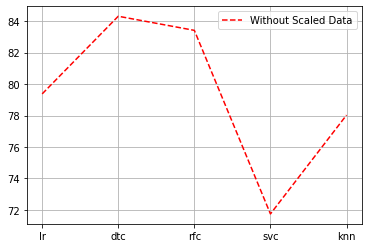

In [627]:
plt.plot(acc1models,acc1values,'r--',label='Without Scaled Data')
plt.legend()
plt.grid()

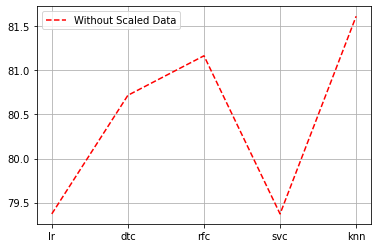

In [628]:
plt.plot(acc2models,acc2values,'r--',label='Without Scaled Data')
plt.legend()
plt.grid()